In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score, mean_squared_error
import sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro


In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score
from sklearn.model_selection import train_test_split

In [151]:
def statsmodels_train_test_split(df, stratify=None, **kwargs):

    if stratify is None:
        y, X = imp.iloc[:,0], imp.drop(columns=imp.columns[0])
        X_train, X_test, y_train, y_test = train_test_split(X,y, **kwargs)
    else:
        y, X = stratify, imp.drop(columns = stratify.name)
        X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, **kwargs)
    
    return pd.concat([X_train, y_train], axis=1), pd.concat([X_test, y_test], axis=1)

In [3]:
pd.set_option('display.max_rows', 1000)


In [4]:
pd.options.display.max_columns = 1000

In [5]:
mtf =pd.read_csv('Mobile_Telecommunications_Franchise_Pole_Reservation_Locations.csv', delimiter = ',', header = 0)
imp =pd.read_csv('Internet_Master_Plan__Adoption_and_Infrastructure_Data_by_Neighborhood.csv', delimiter = ',', header = 0)

In [6]:
mtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10969 entries, 0 to 10968
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          10969 non-null  int64  
 1   Reservation Date            10969 non-null  object 
 2   Franchisee Name             10969 non-null  object 
 3   Status                      10969 non-null  object 
 4   Pole Class                  10969 non-null  object 
 5   Borough                     10969 non-null  object 
 6   X Coord.                    10969 non-null  float64
 7   Y Coord.                    10969 non-null  int64  
 8   Latitude                    10969 non-null  float64
 9   Longitude                   10969 non-null  float64
 10  Zone                        10969 non-null  object 
 11  On street                   10969 non-null  object 
 12  Cross street 1              10969 non-null  object 
 13  Cross street 2              109

In [7]:
mtf.columns

Index(['Id', 'Reservation Date', 'Franchisee Name ', 'Status', 'Pole Class',
       'Borough', 'X Coord.', 'Y Coord.', 'Latitude', 'Longitude', 'Zone',
       'On street', 'Cross street 1', 'Cross street 2', 'Park Advisory',
       'Historic Landmark Advisory', 'Scenic Landmark Advisory',
       'BID Advisory', 'School Advisory', 'Zipcode', 'Community Board',
       'Council District'],
      dtype='object')

In [8]:
mtf.head(10)

,Id,Reservation Date,Franchisee Name,Status,Pole Class,Borough,X Coord.,Y Coord.,Latitude,Longitude,Zone,On street,Cross street 1,Cross street 2,Park Advisory,Historic Landmark Advisory,Scenic Landmark Advisory,BID Advisory,School Advisory,Zipcode,Community Board,Council District
0,21673,07/02/2019,Crown Castle NG,Proposed,CITY,Manhattan,992974.0,220032,40.770609,-73.968504,A,5th Ave,W 69th St,W 70th St,NaN,NaN,Central Park,NaN,NaN,83,164,6
1,21670,07/02/2019,Crown Castle NG,Proposed,CITY,Manhattan,990448.0,221165,40.773721,-73.977622,A,Central Park West,W 68th St,W 69th St,Central Park,NaN,Central Park,NaN,NaN,83,164,6
2,21353,06/25/2019,Crown Castle Solutions,Proposed,CITY,Manhattan,993230.0,226184,40.787494,-73.967572,A,Central Park West,W 90th St,W 89th St,Central Park,NaN,Central Park,NaN,NaN,83,164,6
3,18274,01/08/2018,ExteNet I,Approved,CITY,Manhattan,993428.0,226544,40.788482,-73.966856,A,Central Park W,W 91st St,W 90th St,Central Park,NaN,Central Park,NaN,NaN,83,164,6
4,18116,12/22/2017,Crown Castle NG,Installed,CITY,Manhattan,991792.0,220723,40.772507,-73.972770,A,Center Dr,Nell Singer Lilac Walk,Terrace Dr,Central Park,NaN,Central Park,NaN,NaN,83,164,6
5,17669,12/22/2017,Crown Castle NG,Approved,CITY,Manhattan,995319.0,224257,40.782203,-73.960031,A,5th Ave,E 87th St,E 86th St,NaN,NaN,Central Park,NaN,NaN,83,164,6
6,17500,12/22/2017,Crown Castle NG,Approved,CITY,Manhattan,996190.0,225858,40.786596,-73.956883,A,5th Ave,E 94th St,E 93rd St,Central Park,NaN,Central Park,NaN,NaN,83,164,6
7,17257,12/12/2017,Crown Castle NG,Installed,CITY,Manhattan,998018.0,229130,40.795574,-73.950275,B,5th Ave,E 108th St,E 107th St,NaN,NaN,Central Park,NaN,NaN,83,164,6
8,17048,12/12/2017,Crown Castle Fiber,Installed,CITY,Manhattan,991532.0,219806,40.769990,-73.973710,A,Center Dr,East Dr,65th St Transverse,Central Park,NaN,Central Park,NaN,NaN,83,164,6
9,16826,12/02/2017,Crown Castle Solutions,Installed,CITY,Manhattan,992152.0,221166,40.773722,-73.971470,A,Terrace Dr,Center Drive,East Drive,Central Park,NaN,Central Park,NaN,NaN,83,164,6


In [9]:
mtf2 = mtf.loc[mtf['Park Advisory'].isnull()] 
mtf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10283 entries, 0 to 10968
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          10283 non-null  int64  
 1   Reservation Date            10283 non-null  object 
 2   Franchisee Name             10283 non-null  object 
 3   Status                      10283 non-null  object 
 4   Pole Class                  10283 non-null  object 
 5   Borough                     10283 non-null  object 
 6   X Coord.                    10283 non-null  float64
 7   Y Coord.                    10283 non-null  int64  
 8   Latitude                    10283 non-null  float64
 9   Longitude                   10283 non-null  float64
 10  Zone                        10283 non-null  object 
 11  On street                   10283 non-null  object 
 12  Cross street 1              10283 non-null  object 
 13  Cross street 2              102

In [10]:
mtf2 = mtf2[pd.isnull(mtf2['School Advisory'])]
mtf2 = mtf2[pd.isnull(mtf2['Historic Landmark Advisory'])]
mtf2 = mtf2[pd.isnull(mtf2['Scenic Landmark Advisory'])]
mtf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9282 entries, 48 to 10968
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          9282 non-null   int64  
 1   Reservation Date            9282 non-null   object 
 2   Franchisee Name             9282 non-null   object 
 3   Status                      9282 non-null   object 
 4   Pole Class                  9282 non-null   object 
 5   Borough                     9282 non-null   object 
 6   X Coord.                    9282 non-null   float64
 7   Y Coord.                    9282 non-null   int64  
 8   Latitude                    9282 non-null   float64
 9   Longitude                   9282 non-null   float64
 10  Zone                        9282 non-null   object 
 11  On street                   9282 non-null   object 
 12  Cross street 1              9282 non-null   object 
 13  Cross street 2              927

In [11]:
mtf2.dropna(axis=1, how='all', inplace=True)

In [12]:
mtf2.iloc[::14,16] != np.nan

48       True
154      True
169      True
183      True
197      True
213      True
228      True
244      True
260      True
275      True
292      True
307      True
324      True
343      True
359      True
377      True
392      True
409      True
424      True
447      True
472      True
490      True
509      True
529      True
545      True
570      True
590      True
604      True
618      True
632      True
646      True
661      True
677      True
693      True
709      True
729      True
745      True
772      True
792      True
822      True
844      True
864      True
881      True
929      True
968      True
996      True
1021     True
1046     True
1072     True
1089     True
1113     True
1148     True
1186     True
1208     True
1228     True
1244     True
1258     True
1272     True
1287     True
1302     True
1316     True
1330     True
1344     True
1358     True
1373     True
1389     True
1406     True
1424     True
1438     True
1452     True
1466     True
1481  

In [13]:
mtf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9282 entries, 48 to 10968
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                9282 non-null   int64  
 1   Reservation Date  9282 non-null   object 
 2   Franchisee Name   9282 non-null   object 
 3   Status            9282 non-null   object 
 4   Pole Class        9282 non-null   object 
 5   Borough           9282 non-null   object 
 6   X Coord.          9282 non-null   float64
 7   Y Coord.          9282 non-null   int64  
 8   Latitude          9282 non-null   float64
 9   Longitude         9282 non-null   float64
 10  Zone              9282 non-null   object 
 11  On street         9282 non-null   object 
 12  Cross street 1    9282 non-null   object 
 13  Cross street 2    9272 non-null   object 
 14  BID Advisory      1111 non-null   object 
 15  Zipcode           9282 non-null   int64  
 16  Community Board   9282 non-null   int64 

In [14]:
imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 78 columns):
 #   Column                                                                                                       Non-Null Count  Dtype  
---  ------                                                                                                       --------------  -----  
 0   Neighborhood Tabulation Area Code (NTA Code)                                                                 195 non-null    object 
 1   Neighborhood Tabulation Area Name (NTA NAME)                                                                 195 non-null    object 
 2   Borough Name                                                                                                 195 non-null    object 
 3   Total Population                                                                                             195 non-null    object 
 4   Population Density (per Sq. Mi.)                              

In [15]:
imp.head(20)

,Neighborhood Tabulation Area Code (NTA Code),Neighborhood Tabulation Area Name (NTA NAME),Borough Name,Total Population,Population Density (per Sq. Mi.),Total Number of Households,Area (Sq. Mi.),Street Mileage,Home Broadband Adoption (Percentage of Households),"Home Broadband Adoption by Quartiles (High, Medium-High, Medium-Low, Low)",Mobile Broadband Adoption (Percentage of Households),"Mobile broadband adoption by Quartiles (High, Medium-High, Medium-Low, Low)",Mobile Dependent Households (Percentage of Households),"Mobile Dependent Households Categorized by Quartiles (High, Medium-High, Medium-Low, Low)",Residential Broadband Choice Average by NTA,"Residential Broadband Choice Average by Quartiles (High, Medium-High, Medium-Low, Low)",Commercial Fiber ISP Choice Average by NTA,"Commercial Fiber Choice Average by Quartiles (High, Medium-High, Medium-Low, Low)",Commercial Fiber Max ISP Choice by NTA,"Commercial Fiber Max ISP Choice by Quartiles (High, Medium-High, Medium-Low, Low)",Percentage of Blocks without a Commercial Fiber Provider,Percentage of Blocks without a Commercial Fiber Provider by Quartiles,Percentage of Blocks with ISP Reported Speed Availability of >=25 Mbps (Broadband Speed),Percentage of Blocks with ISP Reported Speed Availability of >=900 Mbps,Number of Public Computer Centers with free public Wi-Fi,Public Wi-Fi in NYC Count,Number of Free Public Wi-Fi Access Points in a Pedestrian Corridor,Available Free Public Wi-Fi in a Pedestrian Corridor (Y/N),Estimated Number of Businesses,Number of Households,Total Accounts,Account Density,Account Density Quartile,Population Projections 2050,Households Receiving Benefits,Estimated Lifeline Eligible Households,Supportive Housing (NYCDHS),Low-Income Housing (NYCHA),Presence of IBZs,Number of NYCHA Buildings,Number of Public Schools,Number of DCAS Buildings,Number of NYC H+H Buildings,City Buildings with High Rooftops (7+ Floors) Capacity by Quartile,Street Furniture: FDNY Call Boxes,Street Furniture: Parking Pay Stations,Street Furniture: Bus Stop Shelters,Street Furniture: Bike Shelters,Street Furniture: City Benches,LinkNYC Kiosks,WalkNYC Sign Locations,Poles Reserved by Mobile Telecom Franchisee,Pole with Equipment Installed by Mobile Telecom Franchise,Density of Poles Reserved and with Equipment Installed for Mobile Telecom Franchise,Mobile Telecom Franchise Pole Density Level by Quartile,Empire City Subway Coverage (Percentage),Empire City Subway Coverage (Quartile),Percentage of Households with fewer than 3 broadband options available,Number of Fixed Wireless Providers Available,Estimated Aerial Plant Coverage (Percentage),Estimated Underground Plant Coverage (Percentage),Geographic Variations in Fiber Delivery Modes by NTA,Estimated Underground Utility Conflict Volume,Utility Pole Make-Ready - Estimated Required Number of Moves,Utility Pole Make-Ready - Estimated Relative Volume,NYC Internet Master Plan Open Access Infrastructure Cost Comparison Coefficient,NYC Internet Master Plan Open Access Infrastructure Cost Comparison Coefficient by Quartile,"Fiber Drops, Estimated Relative Costs","Indoor Cabling for Multiple Dwelling Units, Estimated Relative Costs",Optimal for Unlicensed\nMillimeter Wave Fixed Wireless Access as a Residential\nBroadband Solution,Percentage Optimal for Unlicensed\nMillimeter Wave Fixed Wireless Access as a Residential\nBroadband Solution,Estimated number of radio sites for CBRS coverage,Estimated number of radio sites for mmWave coverage in optimal areas,Sample of NTA Field Surveyed? (Y/N),Reviewed for Underground Fiber-to-the-Premise? (Y/N),Reviewed for Aerial Fiber-to-the-Premise? (Y/N),Reviewed for Millimeter Wave Fixed Wireless Access? (Y/N),Field Survey Findings
0,BK09,Brooklyn Heights-Cobble Hill,Brooklyn,"24,140","67,407.17","11,115",0.36,19,0.85,High,0.82,High,0.04,Medium Low,2.6,High,2.0,High,6,High,0.27,High,1.00,1.00,2,27,17,True,"3,097","11,115","14,212",748,High,"25,509",42,225,0,0,False,0.0,1.0,4.0,0.0,High,45.0,65.0,6.0,

In [16]:
imp.head(3)


,Neighborhood Tabulation Area Code (NTA Code),Neighborhood Tabulation Area Name (NTA NAME),Borough Name,Total Population,Population Density (per Sq. Mi.),Total Number of Households,Area (Sq. Mi.),Street Mileage,Home Broadband Adoption (Percentage of Households),"Home Broadband Adoption by Quartiles (High, Medium-High, Medium-Low, Low)",Mobile Broadband Adoption (Percentage of Households),"Mobile broadband adoption by Quartiles (High, Medium-High, Medium-Low, Low)",Mobile Dependent Households (Percentage of Households),"Mobile Dependent Households Categorized by Quartiles (High, Medium-High, Medium-Low, Low)",Residential Broadband Choice Average by NTA,"Residential Broadband Choice Average by Quartiles (High, Medium-High, Medium-Low, Low)",Commercial Fiber ISP Choice Average by NTA,"Commercial Fiber Choice Average by Quartiles (High, Medium-High, Medium-Low, Low)",Commercial Fiber Max ISP Choice by NTA,"Commercial Fiber Max ISP Choice by Quartiles (High, Medium-High, Medium-Low, Low)",Percentage of Blocks without a Commercial Fiber Provider,Percentage of Blocks without a Commercial Fiber Provider by Quartiles,Percentage of Blocks with ISP Reported Speed Availability of >=25 Mbps (Broadband Speed),Percentage of Blocks with ISP Reported Speed Availability of >=900 Mbps,Number of Public Computer Centers with free public Wi-Fi,Public Wi-Fi in NYC Count,Number of Free Public Wi-Fi Access Points in a Pedestrian Corridor,Available Free Public Wi-Fi in a Pedestrian Corridor (Y/N),Estimated Number of Businesses,Number of Households,Total Accounts,Account Density,Account Density Quartile,Population Projections 2050,Households Receiving Benefits,Estimated Lifeline Eligible Households,Supportive Housing (NYCDHS),Low-Income Housing (NYCHA),Presence of IBZs,Number of NYCHA Buildings,Number of Public Schools,Number of DCAS Buildings,Number of NYC H+H Buildings,City Buildings with High Rooftops (7+ Floors) Capacity by Quartile,Street Furniture: FDNY Call Boxes,Street Furniture: Parking Pay Stations,Street Furniture: Bus Stop Shelters,Street Furniture: Bike Shelters,Street Furniture: City Benches,LinkNYC Kiosks,WalkNYC Sign Locations,Poles Reserved by Mobile Telecom Franchisee,Pole with Equipment Installed by Mobile Telecom Franchise,Density of Poles Reserved and with Equipment Installed for Mobile Telecom Franchise,Mobile Telecom Franchise Pole Density Level by Quartile,Empire City Subway Coverage (Percentage),Empire City Subway Coverage (Quartile),Percentage of Households with fewer than 3 broadband options available,Number of Fixed Wireless Providers Available,Estimated Aerial Plant Coverage (Percentage),Estimated Underground Plant Coverage (Percentage),Geographic Variations in Fiber Delivery Modes by NTA,Estimated Underground Utility Conflict Volume,Utility Pole Make-Ready - Estimated Required Number of Moves,Utility Pole Make-Ready - Estimated Relative Volume,NYC Internet Master Plan Open Access Infrastructure Cost Comparison Coefficient,NYC Internet Master Plan Open Access Infrastructure Cost Comparison Coefficient by Quartile,"Fiber Drops, Estimated Relative Costs","Indoor Cabling for Multiple Dwelling Units, Estimated Relative Costs",Optimal for Unlicensed\nMillimeter Wave Fixed Wireless Access as a Residential\nBroadband Solution,Percentage Optimal for Unlicensed\nMillimeter Wave Fixed Wireless Access as a Residential\nBroadband Solution,Estimated number of radio sites for CBRS coverage,Estimated number of radio sites for mmWave coverage in optimal areas,Sample of NTA Field Surveyed? (Y/N),Reviewed for Underground Fiber-to-the-Premise? (Y/N),Reviewed for Aerial Fiber-to-the-Premise? (Y/N),Reviewed for Millimeter Wave Fixed Wireless Access? (Y/N),Field Survey Findings
0,BK09,Brooklyn Heights-Cobble Hill,Brooklyn,"24,140","67,407.17","11,115",0.36,19,0.85,High,0.82,High,0.04,Medium Low,2.6,High,2.0,High,6,High,0.27,High,1.00,1.00,2,27,17,True,"3,097","11,115","14,212",748,High,"25,509",42,225,0,0,False,0.0,1.0,4.0,0.0,High,45.0,65.0,6.0,

In [17]:
#imp rows edtited to remove commas and change data types to numeric values
imp['Total Population'] = imp['Total Population'].str.replace(',', '').astype(int)
imp['Population Density (per Sq. Mi.)'] = imp['Population Density (per Sq. Mi.)'].str.replace(',', '').astype(float)
imp['Total Number of Households'] = imp['Total Number of Households'].str.replace(',', '').astype(int)
imp['Number of Households'] = imp['Number of Households'].str.replace(',', '').astype(float)
imp['Total Accounts'] = imp['Total Accounts'].str.replace(',', '').astype(float) 
imp['Estimated Number of Businesses'] = imp['Estimated Number of Businesses'].str.replace(',', '').astype(float)
imp['Account Density'] = imp['Account Density'].str.replace(',', '').astype(float)
imp['Population Projections 2050'] = imp['Population Projections 2050'].str.replace(',', '').astype(float)
imp['Households Receiving Benefits'] = imp['Households Receiving Benefits'].str.replace(',', '').astype(float)


In [18]:
imp['Estimated Lifeline Eligible Households'] = imp['Estimated Lifeline Eligible Households'].str.replace(',', '').astype(float)
imp['Supportive Housing (NYCDHS)'] = imp['Supportive Housing (NYCDHS)'].str.replace(',', '').astype(float)
imp['Low-Income Housing (NYCHA)'] = imp['Low-Income Housing (NYCHA)'].str.replace(',', '').astype(float)

In [19]:

imp = imp.astype({"Poles Reserved by Mobile Telecom Franchisee": float, "Pole with Equipment Installed by Mobile Telecom Franchise": float, "Density of Poles Reserved and with Equipment Installed for Mobile Telecom Franchise":float})

In [100]:
imp = imp.rename(columns = {'Utility_Pole_Make-Ready_-_Estimated_Required_Number_of_Moves': 'Utility_Pole_Make_Ready_Estimated_Required_Number_of_Moves'})

In [101]:
imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 79 columns):
 #   Column                                                                                                       Non-Null Count  Dtype  
---  ------                                                                                                       --------------  -----  
 0   Neighborhood_Tabulation_Area_Code__NTA_Code_                                                                 195 non-null    object 
 1   Neighborhood_Tabulation_Area_Name__NTA_NAME_                                                                 195 non-null    object 
 2   Borough_Name                                                                                                 195 non-null    object 
 3   Total_Population                                                                                             195 non-null    int32  
 4   Population_Density__per_Sq__Mi__                              

In [21]:
imp.mean()

Total Population                                                                                                 43420.728205
Population Density (per Sq. Mi.)                                                                                 44394.961598
Total Number of Households                                                                                       16114.897436
Area (Sq. Mi.)                                                                                                       1.550462
Street Mileage                                                                                                      45.784615
Home Broadband Adoption (Percentage of Households)                                                                   0.686769
Mobile Broadband Adoption (Percentage of Households)                                                                 0.695333
Mobile Dependent Households (Percentage of Households)                                                               0

####Create a new metric to determine best neighborhoods with future revenue
Keep neighborhoods where (Population 2030 to 2050 - Total Population) > Average (Population 2030 to 2050 - Total Population)
Population Density per Square mile can also be a metric for Neighborhood selection




In [22]:
mtf2['Borough'].value_counts(dropna=False)

Manhattan        2223
Bronx            2220
Queens           2136
Brooklyn         1712
Staten_Island     991
Name: Borough, dtype: int64

In [23]:
imp.groupby('Borough Name')['Poles Reserved by Mobile Telecom Franchisee'].sum()

Borough Name
Bronx            346.0
Brooklyn         408.0
Manhattan        358.0
Queens           598.0
Staten Island     11.0
Name: Poles Reserved by Mobile Telecom Franchisee, dtype: float64

In [24]:
imp.groupby('Borough Name')['Pole with Equipment Installed by Mobile Telecom Franchise'].sum() 

Borough Name
Bronx            1059.0
Brooklyn          709.0
Manhattan        1975.0
Queens            668.0
Staten Island     480.0
Name: Pole with Equipment Installed by Mobile Telecom Franchise, dtype: float64

In [25]:
imp.groupby('Borough Name')['Density of Poles Reserved and with Equipment Installed for Mobile Telecom Franchise'].mean()

Borough Name
Bronx            1.230000
Brooklyn         0.569608
Manhattan        2.202414
Queens           0.433793
Staten Island    0.405789
Name: Density of Poles Reserved and with Equipment Installed for Mobile Telecom Franchise, dtype: float64

In [26]:
imp.groupby('Borough Name')['Mobile Dependent Households (Percentage of Households)'].median()

Borough Name
Bronx            0.065
Brooklyn         0.050
Manhattan        0.040
Queens           0.050
Staten Island    0.030
Name: Mobile Dependent Households (Percentage of Households), dtype: float64

In [27]:
imp['Population Growth'] = imp['Population Projections 2050']-imp['Total Population']

In [173]:
imp.Poles_Reserved_by_Mobile_Telecom_Franchisee.mean()

8.871134020618557

In [169]:
def Pole_Rich(Poles_Reserved_by_Mobile_Telecom_Franchisee):
    if Poles_Reserved_by_Mobile_Telecom_Franchisee >= 8.871134020618557:
        return "Poles Reserved Above Average"
    elif Poles_Reserved_by_Mobile_Telecom_Franchisee  < 8.871134020618557:
        return "Poles Reserved Below Average"
    else:
        return "unknown"

In [170]:
imp['Pole_Rich'] = np.vectorize(Pole_Rich)(imp['Poles_Reserved_by_Mobile_Telecom_Franchisee'])

C:\Users\shant\miniconda3\lib\site-packages\numpy\lib\function_base.py:2167: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


In [171]:
imp.head(5)

,Neighborhood_Tabulation_Area_Code__NTA_Code_,Neighborhood_Tabulation_Area_Name__NTA_NAME_,Borough_Name,Total_Population,Population_Density__per_Sq__Mi__,Total_Number_of_Households,Area__Sq__Mi__,Street_Mileage,Home_Broadband_Adoption__Percentage_of_Households_,"Home_Broadband_Adoption_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_",Mobile_Broadband_Adoption__Percentage_of_Households_,"Mobile_broadband_adoption_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_",Mobile_Dependent_Households__Percentage_of_Households_,"Mobile_Dependent_Households_Categorized_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_",Residential_Broadband_Choice_Average_by_NTA,"Residential_Broadband_Choice_Average_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_",Commercial_Fiber_ISP_Choice_Average_by_NTA,"Commercial_Fiber_Choice_Average_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_",Commercial_Fiber_Max_ISP_Choice_by_NTA,"Commercial_Fiber_Max_ISP_Choice_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_",Percentage_of_Blocks_without_a_Commercial_Fiber_Provider,Percentage_of_Blocks_without_a_Commercial_Fiber_Provider_by_Quartiles,Percentage_of_Blocks_with_ISP_Reported_Speed_Availability_of_>=25_Mbps__Broadband_Speed_,Percentage_of_Blocks_with_ISP_Reported_Speed_Availability_of_>=900_Mbps,Number_of_Public_Computer_Centers_with_free_public_Wi-Fi,Public_Wi-Fi_in_NYC_Count,Number_of_Free_Public_Wi-Fi_Access_Points_in_a_Pedestrian_Corridor,Available_Free_Public_Wi-Fi_in_a_Pedestrian_Corridor__Y/N_,Estimated_Number_of_Businesses,Number_of_Households,Total_Accounts,Account_Density,Account_Density_Quartile,Population_Projections_2050,Households_Receiving_Benefits,Estimated_Lifeline_Eligible_Households,Supportive_Housing__NYCDHS_,Low-Income_Housing__NYCHA_,Presence_of_IBZs,Number_of_NYCHA_Buildings,Number_of_Public_Schools,Number_of_DCAS_Buildings,Number_of_NYC_H+H_Buildings,City_Buildings_with_High_Rooftops__7+_Floors__Capacity_by_Quartile,Street_Furniture:_FDNY_Call_Boxes,Street_Furniture:_Parking_Pay_Stations,Street_Furniture:_Bus_Stop_Shelters,Street_Furniture:_Bike_Shelters,Street_Furniture:_City_Benches,LinkNYC_Kiosks,WalkNYC_Sign_Locations,Poles_Reserved_by_Mobile_Telecom_Franchisee,Pole_with_Equipment_Installed_by_Mobile_Telecom_Franchise,Density_of_Poles_Reserved_and_with_Equipment_Installed_for_Mobile_Telecom_Franchise,Mobile_Telecom_Franchise_Pole_Density_Level_by_Quartile,Empire_City_Subway_Coverage__Percentage_,Empire_City_Subway_Coverage__Quartile_,Percentage_of_Households_with_fewer_than_3_broadband_options_available,Number_of_Fixed_Wireless_Providers_Available,Estimated_Aerial_Plant_Coverage__Percentage_,Estimated_Underground_Plant_Coverage__Percentage_,Geographic_Variations_in_Fiber_Delivery_Modes_by_NTA,Estimated_Underground_Utility_Conflict_Volume,Utility_Pole_Make_Ready_Estimated_Required_Number_of_Moves,Utility_Pole_Make-Ready_-_Estimated_Relative_Volume,NYC_Internet_Master_Plan_Open_Access_Infrastructure_Cost_Comparison_Coefficient,NYC_Internet_Master_Plan_Open_Access_Infrastructure_Cost_Comparison_Coefficient_by_Quartile,"Fiber_Drops,_Estimated_Relative_Costs","Indoor_Cabling_for_Multiple_Dwelling_Units,_Estimated__Relative_Costs",Optimal_for_Unlicensed\nMillimeter_Wave_Fixed_Wireless_Access_as_a_Residential\nBroadband_Solution,Percentage_Optimal_for_Unlicensed\nMillimeter_Wave_Fixed_Wireless_Access_as_a_Residential\nBroadband_Solution,Estimated_number_of_radio_sites_for_CBRS_coverage,Estimated_number_of_radio_sites_for_mmWave_coverage_in_optimal_areas,Sample_of_NTA_Field_Surveyed?__Y/N_,Reviewed_for_Underground_Fiber-to-the-Premise?__Y/N_,Reviewed_for_Aerial_Fiber-to-the-Premise?__Y/N_,Reviewed_for_Millimeter_Wave_Fixed_Wireless_Access?__Y/N_,Field_Survey_Findings,Population_Growth,Pole_Rich
0,BK09,Brooklyn Heights-Cobble Hill,Brooklyn,24140,67407.17,11115,0.36,19,0.85,High,0.82,High,0.04,Medium Low,2.6,High,2.0,High,6,High,0.27,High,1.00,1.00,2,27,17,True,3097.0,11115.0,14212.0,748.0,High,25509.0,42.0,225.0,0.0,0.0,False,0.0,1.0,4.0

In [29]:
imp['Population Growth'].mean()

3622.2659574468084

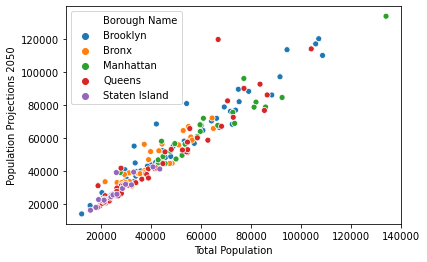

In [30]:
sns.scatterplot(x = "Total Population", y = 'Population Projections 2050', data=imp, hue='Borough Name')
plt.show()

In [31]:
high_growth = imp[(imp['Population Growth'] > 3622) & (imp['Population Density (per Sq. Mi.)'] > 44394.961598)]
high_growth['Population Density (per Sq. Mi.)']

2       55432.80
8       54747.36
9       50080.12
14      73847.55
27      61122.10
28      57864.19
30      55846.77
31      51230.88
32      52498.59
33      81227.34
34      52467.36
35      64354.26
37      68038.22
38      52056.56
40      51231.34
42      49377.63
44      54677.41
49      47693.66
53     104083.79
60      98747.09
61      64447.07
63      66311.76
65      55569.63
67      66282.21
70      69804.19
71      65919.70
72      72895.38
75     125654.72
76     100354.44
85      53777.07
96      58128.36
97     105290.94
98      67181.49
100     79549.63
101     91947.44
105     47867.59
107     86316.90
111    100090.93
112     69465.25
133     52055.19
138     60660.14
139     71384.84
167     45106.27
170     54755.49
171     50172.21
Name: Population Density (per Sq. Mi.), dtype: float64

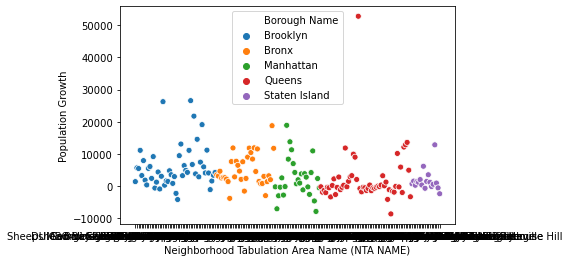

In [32]:
sns.scatterplot(x = "Neighborhood Tabulation Area Name (NTA NAME)", y = 'Population Growth', data=imp, hue='Borough Name')
plt.show()

In [33]:
imp.columns

Index(['Neighborhood Tabulation Area Code (NTA Code)',
       'Neighborhood Tabulation Area Name (NTA NAME)', 'Borough Name',
       'Total Population', 'Population Density (per Sq. Mi.)',
       'Total Number of Households', 'Area (Sq. Mi.)', 'Street Mileage',
       'Home Broadband Adoption (Percentage of Households)',
       'Home Broadband Adoption by Quartiles (High, Medium-High, Medium-Low, Low)',
       'Mobile Broadband Adoption (Percentage of Households)',
       'Mobile broadband adoption by Quartiles (High, Medium-High, Medium-Low, Low)',
       'Mobile Dependent Households (Percentage of Households)',
       'Mobile Dependent Households Categorized by Quartiles (High, Medium-High, Medium-Low, Low)',
       'Residential Broadband Choice Average by NTA',
       'Residential Broadband Choice Average by Quartiles (High, Medium-High, Medium-Low, Low)',
       'Commercial Fiber ISP Choice Average by NTA',
       'Commercial Fiber Choice Average by Quartiles (High, Medium-High, Me

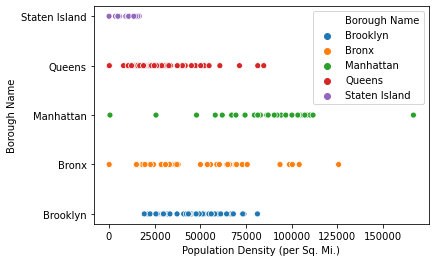

In [34]:
sns.scatterplot(x = 'Population Density (per Sq. Mi.)', y = "Borough Name", data=imp, hue='Borough Name')
plt.show()

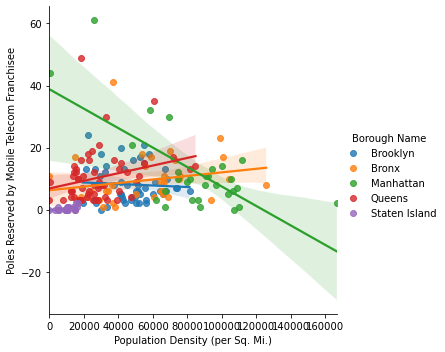

In [35]:
sns.lmplot(x = 'Population Density (per Sq. Mi.)', y = 'Poles Reserved by Mobile Telecom Franchisee', data=imp, hue='Borough Name')
plt.show()
#do businesses account for the high amount of poles in a low population density area?

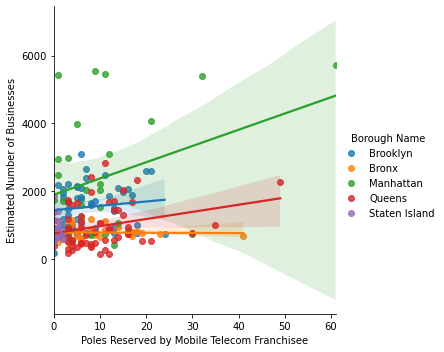

In [36]:
sns.lmplot(x = 'Poles Reserved by Mobile Telecom Franchisee', y = 'Estimated Number of Businesses', data=imp, hue='Borough Name')
plt.show()
#do businesses account for the high amount of poles in a low population density area?

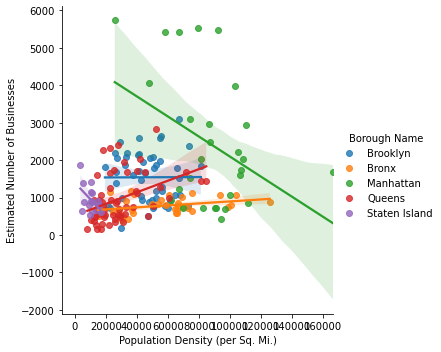

In [37]:
sns.lmplot(x = 'Population Density (per Sq. Mi.)', y = 'Estimated Number of Businesses', data=imp, hue='Borough Name')
plt.show()
#do businesses account for the high amount of poles in a low population density area?

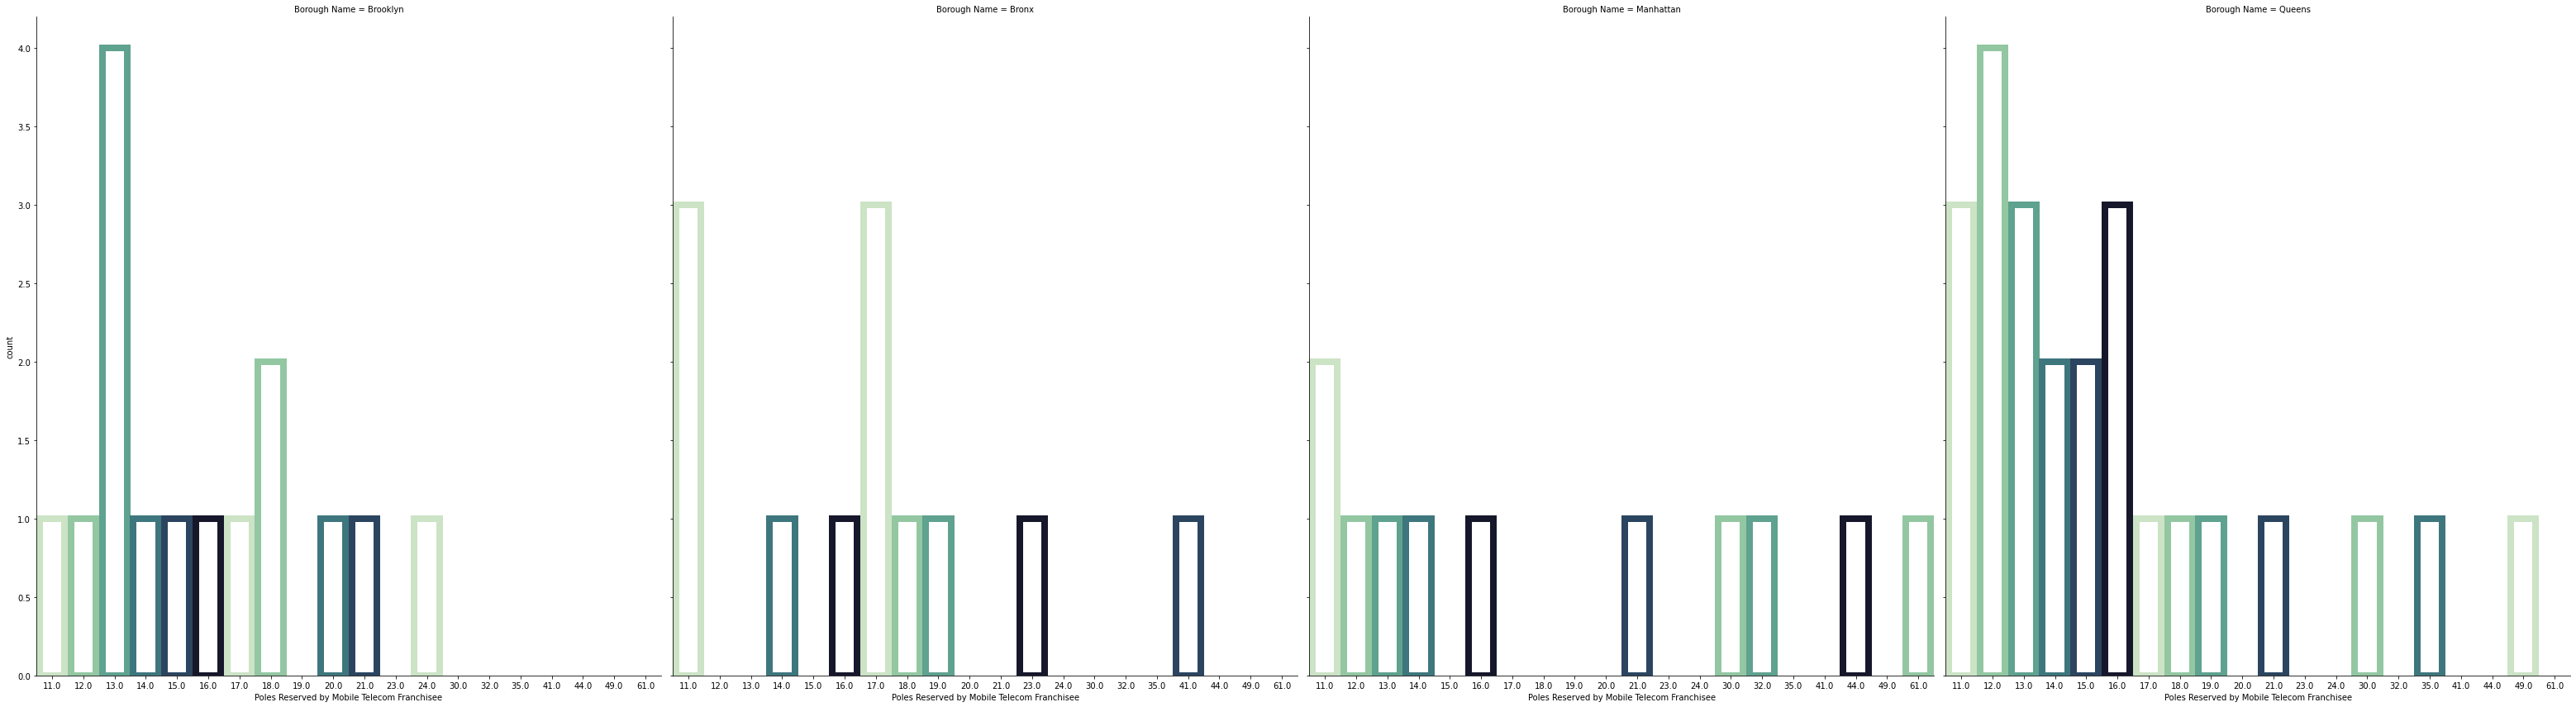

In [38]:
g = sns.catplot('Poles Reserved by Mobile Telecom Franchisee', col='Borough Name', col_wrap=4, data=imp[#(FINAL['renta']> 175000) & 
    (imp['Poles Reserved by Mobile Telecom Franchisee']>10)],kind="count", height=12, aspect=.9, 
                facecolor=(0, 0, 0, 0),
                   linewidth=8,
                   edgecolor=sns.color_palette("ch:55530555.1,-.5,dark=.1"))

In [233]:
mtf2.to_csv('mtf2.csv', index = False, header=True)
imp.to_csv('imp.csv', index = False, header=True)

In [40]:
imp.columns = [item.replace(" ","_") for item in imp.columns]

In [41]:
imp.columns = [item.replace("(","_") for item in imp.columns]
imp.columns = [item.replace(")","_") for item in imp.columns]
imp.columns = [item.replace(".","_") for item in imp.columns]

In [42]:
imp.head()

,Neighborhood_Tabulation_Area_Code__NTA_Code_,Neighborhood_Tabulation_Area_Name__NTA_NAME_,Borough_Name,Total_Population,Population_Density__per_Sq__Mi__,Total_Number_of_Households,Area__Sq__Mi__,Street_Mileage,Home_Broadband_Adoption__Percentage_of_Households_,"Home_Broadband_Adoption_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_",Mobile_Broadband_Adoption__Percentage_of_Households_,"Mobile_broadband_adoption_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_",Mobile_Dependent_Households__Percentage_of_Households_,"Mobile_Dependent_Households_Categorized_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_",Residential_Broadband_Choice_Average_by_NTA,"Residential_Broadband_Choice_Average_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_",Commercial_Fiber_ISP_Choice_Average_by_NTA,"Commercial_Fiber_Choice_Average_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_",Commercial_Fiber_Max_ISP_Choice_by_NTA,"Commercial_Fiber_Max_ISP_Choice_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_",Percentage_of_Blocks_without_a_Commercial_Fiber_Provider,Percentage_of_Blocks_without_a_Commercial_Fiber_Provider_by_Quartiles,Percentage_of_Blocks_with_ISP_Reported_Speed_Availability_of_>=25_Mbps__Broadband_Speed_,Percentage_of_Blocks_with_ISP_Reported_Speed_Availability_of_>=900_Mbps,Number_of_Public_Computer_Centers_with_free_public_Wi-Fi,Public_Wi-Fi_in_NYC_Count,Number_of_Free_Public_Wi-Fi_Access_Points_in_a_Pedestrian_Corridor,Available_Free_Public_Wi-Fi_in_a_Pedestrian_Corridor__Y/N_,Estimated_Number_of_Businesses,Number_of_Households,Total_Accounts,Account_Density,Account_Density_Quartile,Population_Projections_2050,Households_Receiving_Benefits,Estimated_Lifeline_Eligible_Households,Supportive_Housing__NYCDHS_,Low-Income_Housing__NYCHA_,Presence_of_IBZs,Number_of_NYCHA_Buildings,Number_of_Public_Schools,Number_of_DCAS_Buildings,Number_of_NYC_H+H_Buildings,City_Buildings_with_High_Rooftops__7+_Floors__Capacity_by_Quartile,Street_Furniture:_FDNY_Call_Boxes,Street_Furniture:_Parking_Pay_Stations,Street_Furniture:_Bus_Stop_Shelters,Street_Furniture:_Bike_Shelters,Street_Furniture:_City_Benches,LinkNYC_Kiosks,WalkNYC_Sign_Locations,Poles_Reserved_by_Mobile_Telecom_Franchisee,Pole_with_Equipment_Installed_by_Mobile_Telecom_Franchise,Density_of_Poles_Reserved_and_with_Equipment_Installed_for_Mobile_Telecom_Franchise,Mobile_Telecom_Franchise_Pole_Density_Level_by_Quartile,Empire_City_Subway_Coverage__Percentage_,Empire_City_Subway_Coverage__Quartile_,Percentage_of_Households_with_fewer_than_3_broadband_options_available,Number_of_Fixed_Wireless_Providers_Available,Estimated_Aerial_Plant_Coverage__Percentage_,Estimated_Underground_Plant_Coverage__Percentage_,Geographic_Variations_in_Fiber_Delivery_Modes_by_NTA,Estimated_Underground_Utility_Conflict_Volume,Utility_Pole_Make-Ready_-_Estimated_Required_Number_of_Moves,Utility_Pole_Make-Ready_-_Estimated_Relative_Volume,NYC_Internet_Master_Plan_Open_Access_Infrastructure_Cost_Comparison_Coefficient,NYC_Internet_Master_Plan_Open_Access_Infrastructure_Cost_Comparison_Coefficient_by_Quartile,"Fiber_Drops,_Estimated_Relative_Costs","Indoor_Cabling_for_Multiple_Dwelling_Units,_Estimated__Relative_Costs",Optimal_for_Unlicensed\nMillimeter_Wave_Fixed_Wireless_Access_as_a_Residential\nBroadband_Solution,Percentage_Optimal_for_Unlicensed\nMillimeter_Wave_Fixed_Wireless_Access_as_a_Residential\nBroadband_Solution,Estimated_number_of_radio_sites_for_CBRS_coverage,Estimated_number_of_radio_sites_for_mmWave_coverage_in_optimal_areas,Sample_of_NTA_Field_Surveyed?__Y/N_,Reviewed_for_Underground_Fiber-to-the-Premise?__Y/N_,Reviewed_for_Aerial_Fiber-to-the-Premise?__Y/N_,Reviewed_for_Millimeter_Wave_Fixed_Wireless_Access?__Y/N_,Field_Survey_Findings,Population_Growth
0,BK09,Brooklyn Heights-Cobble Hill,Brooklyn,24140,67407.17,11115,0.36,19,0.85,High,0.82,High,0.04,Medium Low,2.6,High,2.0,High,6,High,0.27,High,1.00,1.00,2,27,17,True,3097.0,11115.0,14212.0,748.0,High,25509.0,42.0,225.0,0.0,0.0,False,0.0,1.0,4.0,0.0,Hig

In [43]:
from sklearn.model_selection import train_test_split

In [126]:
imp.columns

Index(['Neighborhood_Tabulation_Area_Code__NTA_Code_',
       'Neighborhood_Tabulation_Area_Name__NTA_NAME_', 'Borough_Name',
       'Total_Population', 'Population_Density__per_Sq__Mi__',
       'Total_Number_of_Households', 'Area__Sq__Mi__', 'Street_Mileage',
       'Home_Broadband_Adoption__Percentage_of_Households_',
       'Home_Broadband_Adoption_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_',
       'Mobile_Broadband_Adoption__Percentage_of_Households_',
       'Mobile_broadband_adoption_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_',
       'Mobile_Dependent_Households__Percentage_of_Households_',
       'Mobile_Dependent_Households_Categorized_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_',
       'Residential_Broadband_Choice_Average_by_NTA',
       'Residential_Broadband_Choice_Average_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_',
       'Commercial_Fiber_ISP_Choice_Average_by_NTA',
       'Commercial_Fiber_Choice_Average_by_Quartiles__High,_Medium-High,_Me

In [139]:
X = imp[['Total_Population',
         'Percentage_of_Blocks_without_a_Commercial_Fiber_Provider', 
         'Population_Density__per_Sq__Mi__', 
         'Population_Growth',
         'Density_of_Poles_Reserved_and_with_Equipment_Installed_for_Mobile_Telecom_Franchise',
         'Utility_Pole_Make_Ready_Estimated_Required_Number_of_Moves',
         'Estimated_Number_of_Businesses', 
         'Presence_of_IBZs',
         'Fiber_Drops,_Estimated_Relative_Costs',
         'Percentage_of_Blocks_without_a_Commercial_Fiber_Provider',  
         'Commercial_Fiber_Max_ISP_Choice_by_NTA']]

In [140]:
y = imp['Poles_Reserved_by_Mobile_Telecom_Franchisee']

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

In [142]:
imp_train = pd.concat([X_train, y_train], axis = 1)

In [143]:
imp_test = pd.concat([X_test,y_test], axis = 1)


In [148]:
train, test = statsmodels_train_test_split(raw)

NameError: name 'statsmodels_train_test_split' is not defined

In [145]:
linear_model = smf.ols(formula='Poles_Reserved_by_Mobile_Telecom_Franchisee ~  Estimated_Number_of_Businesses + Total_Population + Population_Growth +  C(Presence_of_IBZs) + Utility_Pole_Make_Ready_Estimated_Required_Number_of_Moves', data=imp_train).fit()

linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         OLS Regression Results                                        
=======================================================================================================
Dep. Variable:     Poles_Reserved_by_Mobile_Telecom_Franchisee   R-squared:                       0.383
Model:                                                     OLS   Adj. R-squared:                  0.360
Method:                                          Least Squares   F-statistic:                     16.87
Date:                                         Mon, 21 Sep 2020   Prob (F-statistic):           5.98e-13
Time:                                                 12:45:17   Log-Likelihood:                -478.02
No. Observations:                                          142   AIC:                             968.0
Df Residuals:                                              136   BIC:                             985.8
Df Model:                                                    5                                         
Covariance Type:                                     nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Intercept                                                      4.4344      4.311      1.029      0.306      -4.091      12.960
C(Presence_of_IBZs)[T.True]                                    2.5385      1.492      1.701      0.091      -0.413       5.490
Estimated_Number_of_Businesses                                 0.0008      0.001      1.336      0.184      -0.000       0.002
Total_Population                                               0.0001   2.91e-05      4.111      0.000    6.21e-05       0.000
Population_Growth                                              0.0006    9.4e-05      6.029      0.000       0.000       0.001
Utility_Pole_Make_Ready_Estimated_Required_Number_of_Moves    -1.1379      1.183     -0.962      0.338      -3.477       1.201
==============================================================================
Omnibus:                      104.334   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1269.859
Skew:                           2.394   Prob(JB):                    1.79e-276
Kurtosis:                      16.846   Cond. No.                     3.83e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [174]:
X = imp[['Total_Population',
         'Percentage_of_Blocks_without_a_Commercial_Fiber_Provider', 
         'Population_Density__per_Sq__Mi__', 
         'Population_Growth',
         'Density_of_Poles_Reserved_and_with_Equipment_Installed_for_Mobile_Telecom_Franchise',
         'Utility_Pole_Make_Ready_Estimated_Required_Number_of_Moves',
         'Estimated_Number_of_Businesses', 
         'Fiber_Drops,_Estimated_Relative_Costs',
         'Percentage_of_Blocks_without_a_Commercial_Fiber_Provider',  
         'Commercial_Fiber_Max_ISP_Choice_by_NTA']]

In [181]:
y = imp['Poles_Reserved_by_Mobile_Telecom_Franchisee']

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

In [197]:
imp_train = pd.concat([X_train, y_train], axis = 1)

In [198]:
imp_test = pd.concat([X_test,y_test], axis = 1)


In [199]:
linear_model = smf.ols(formula='Poles_Reserved_by_Mobile_Telecom_Franchisee ~  Estimated_Number_of_Businesses + Total_Population + Population_Growth + Utility_Pole_Make_Ready_Estimated_Required_Number_of_Moves', data=imp_train).fit()

linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         OLS Regression Results                                        
=======================================================================================================
Dep. Variable:     Poles_Reserved_by_Mobile_Telecom_Franchisee   R-squared:                       0.402
Model:                                                     OLS   Adj. R-squared:                  0.384
Method:                                          Least Squares   F-statistic:                     22.51
Date:                                         Tue, 22 Sep 2020   Prob (F-statistic):           3.10e-14
Time:                                                 09:53:32   Log-Likelihood:                -468.61
No. Observations:                                          139   AIC:                             947.2
Df Residuals:                                              134   BIC:                             961.9
Df Model:                                                    4                                         
Covariance Type:                                     nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Intercept                                                      3.5946      4.192      0.858      0.393      -4.695      11.885
Estimated_Number_of_Businesses                                 0.0013      0.001      1.979      0.050    9.89e-07       0.003
Total_Population                                               0.0001   2.98e-05      4.268      0.000    6.84e-05       0.000
Population_Growth                                              0.0006    9.5e-05      6.431      0.000       0.000       0.001
Utility_Pole_Make_Ready_Estimated_Required_Number_of_Moves    -1.0172      1.210     -0.841      0.402      -3.410       1.375
==============================================================================
Omnibus:                       93.350   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              792.096
Skew:                           2.250   Prob(JB):                    9.97e-173
Kurtosis:                      13.794   Cond. No.                     3.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [186]:
y_pred_test = linear_model.predict(test)
y_pred_test

NameError: name 'test' is not defined

In [187]:
from sklearn.metrics import r2_score

In [188]:
linear_model.params

Intercept                                                     6.829723
Estimated_Number_of_Businesses                               -0.000227
Total_Population                                              0.000167
Population_Growth                                             0.000527
Utility_Pole_Make_Ready_Estimated_Required_Number_of_Moves   -1.843827
dtype: float64

In [189]:
## THIS IS MODEL PREDICTION ON NEW DATA THE MODEL HAS NEVER SEEN!! NOTICE WE ARE USING THE TEST SET
y_test_pred = linear_model.predict(X_test)


In [205]:
X = imp[['Total_Population',
         'Percentage_of_Blocks_without_a_Commercial_Fiber_Provider', 
         'Population_Density__per_Sq__Mi__', 
         'Population_Growth',
         'Density_of_Poles_Reserved_and_with_Equipment_Installed_for_Mobile_Telecom_Franchise',
         'Utility_Pole_Make_Ready_Estimated_Required_Number_of_Moves',
         'Estimated_Number_of_Businesses', 
         'Fiber_Drops,_Estimated_Relative_Costs',
         'Percentage_of_Blocks_without_a_Commercial_Fiber_Provider',  
         'Commercial_Fiber_Max_ISP_Choice_by_NTA']]

In [206]:
y = imp['Poles_Reserved_by_Mobile_Telecom_Franchisee']

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

In [208]:
imp_train = pd.concat([X_train, y_train], axis = 1)

In [209]:
imp_test = pd.concat([X_test,y_test], axis = 1)


In [210]:
linear_model = smf.ols(formula='Poles_Reserved_by_Mobile_Telecom_Franchisee ~  Estimated_Number_of_Businesses + Total_Population + Population_Growth + Utility_Pole_Make_Ready_Estimated_Required_Number_of_Moves', data=imp_train).fit()

linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         OLS Regression Results                                        
=======================================================================================================
Dep. Variable:     Poles_Reserved_by_Mobile_Telecom_Franchisee   R-squared:                       0.395
Model:                                                     OLS   Adj. R-squared:                  0.377
Method:                                          Least Squares   F-statistic:                     22.02
Date:                                         Tue, 22 Sep 2020   Prob (F-statistic):           5.23e-14
Time:                                                 09:54:10   Log-Likelihood:                -462.32
No. Observations:                                          140   AIC:                             934.6
Df Residuals:                                              135   BIC:                             949.3
Df Model:                                                    4                                         
Covariance Type:                                     nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Intercept                                                      4.0594      3.821      1.062      0.290      -3.497      11.616
Estimated_Number_of_Businesses                                 0.0011      0.001      1.926      0.056   -3.05e-05       0.002
Total_Population                                               0.0001   2.73e-05      4.869      0.000    7.89e-05       0.000
Population_Growth                                              0.0005   8.55e-05      6.146      0.000       0.000       0.001
Utility_Pole_Make_Ready_Estimated_Required_Number_of_Moves    -1.1999      1.104     -1.087      0.279      -3.383       0.984
==============================================================================
Omnibus:                      107.418   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1603.562
Skew:                           2.440   Prob(JB):                         0.00
Kurtosis:                      18.845   Cond. No.                     3.58e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [211]:
predictions = linear_model.predict(imp_test)

In [212]:
predictions = predictions.dropna()

In [213]:
imp_test = imp_test.dropna()

In [214]:
r2_score(imp_test['Poles_Reserved_by_Mobile_Telecom_Franchisee'], predictions)

0.2379349068853569

In [225]:
imp.Pole_Rich

0      Poles Reserved Below Average
1      Poles Reserved Above Average
2      Poles Reserved Below Average
3      Poles Reserved Above Average
4      Poles Reserved Below Average
5      Poles Reserved Below Average
6      Poles Reserved Below Average
7      Poles Reserved Below Average
8      Poles Reserved Above Average
9      Poles Reserved Below Average
10     Poles Reserved Below Average
11     Poles Reserved Above Average
12     Poles Reserved Above Average
13     Poles Reserved Above Average
14     Poles Reserved Below Average
15     Poles Reserved Below Average
16     Poles Reserved Above Average
17     Poles Reserved Above Average
18     Poles Reserved Below Average
19     Poles Reserved Below Average
20     Poles Reserved Above Average
21     Poles Reserved Above Average
22     Poles Reserved Below Average
23     Poles Reserved Below Average
24     Poles Reserved Below Average
25     Poles Reserved Above Average
26     Poles Reserved Below Average
27     Poles Reserved Above 

In [224]:
imp.drop(imp.index[87], inplace = True)

In [230]:
imp.drop('Empire_City_Subway_Coverage__Quartile_', axis=1, inplace= True)

In [231]:
imp.dropna(inplace=True)

In [232]:
imp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 193
Data columns (total 79 columns):
 #   Column                                                                                                       Non-Null Count  Dtype  
---  ------                                                                                                       --------------  -----  
 0   Neighborhood_Tabulation_Area_Code__NTA_Code_                                                                 187 non-null    object 
 1   Neighborhood_Tabulation_Area_Name__NTA_NAME_                                                                 187 non-null    object 
 2   Borough_Name                                                                                                 187 non-null    object 
 3   Total_Population                                                                                             187 non-null    int32  
 4   Population_Density__per_Sq__Mi__                              